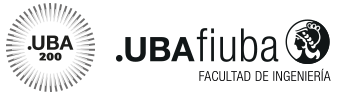

# <center> ANÁLISIS NUMÉRICO I - MODELACIÓN NUMÉRICA
    
# <center> Ecuaciones no Lineales - Cuarta Parte
    
# <center>Uso de funciones integradas de SciPy

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 Análisis Numérico I. *Curso 4*.
- CB051 Modelación Numérica. *Curso 4*.

# <center> CASO A ANALIZAR
___
Hallar $p$ tal que $f(p)=0,$ $p  \in [10,150]$ siendo :
$$f(x)=\frac{9,80665\cdot 12^2}{2\cdot \pi}\cdot \tanh\left(\frac{2\cdot \pi\cdot 14}{x}\right)-x.$$

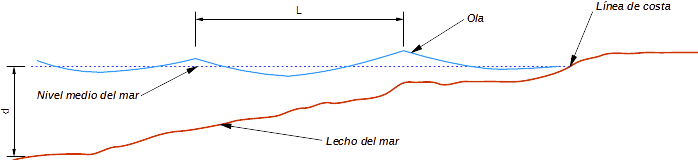


### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$



## <center> Uso de «newton»
    
<b>Python</b> tiene un módulo llamado <b>SciPy</b> que incluye una función para maximizar o minimizar funciones y obtener raíces de ecuaciones. Se llama <i>Optimize</i>, que incluye una función llamada <i>newton</i> para obtener las raíces de funciones. Su sintaxis es:

<i>newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)</i>

con:

* <i>func</i>: función de la cual se busca la raíz.
* <i>x0</i>: valor inicial.
* <i>fprime</i>: derivada primera de la función ingresada (<i>func</i>).
* <i>args()</i>: si la función tiene más «variables», deben incluirse los valores numéricos en <i>args()</i>.
* <i>tol</i>: tolerancia de la raíza buscada. Por omisión es $1.48\cdot 10^{-8}$.
* <i>maxiter</i>: cantidad máxima de iteraciones. Por omisión es 50.
* <i>fprime2</i>: derivada segunda de la función ingresada (<i>func</i>).
* <i>x1</i>: valor adicional si no se ingresa la derivada primera.
* <i>rtol</i>: tolerancia adicional para $f(x)$. Por omisión es $f(x)=rtol=0$.
* <i>full_output</i>: define si muestra solo la raíz (<i>False</i>) o más información (<i>True</i>). Por omisión es <i>False>/i>.
* <i>disp</i>: muesta el tiempo del cálculo si no convergió a una raíz.
    
    Vamos a importar entonces la función «<i>newton</i>», y las otras librerías.

In [1]:
from scipy.optimize import newton as nwt #importamos Newton de SciPy y la denominamos «nwt».
import numpy as np #libreria de funciones numéricas
#import pandas as pd #librería para manejo de datos

Es bueno ver que la función <i>newton</i> incluye tres métodos:
1. <b>Newton-Raphson</b>;
2. <b>Secante</b>, y;
3. <b>Halley</b>.


### Uso de «<i>newton</i>» con aplicación del Método de la Secante

En este caso usaremos la función <i>newton</i> ingresando solamente la función y los valores del intervalo.

Primero definimos la función de la cual queremos obtener la raíz.

In [2]:
def f(x):
    return 9.80665*(12**2)/(2*np.pi)*np.tanh(2*np.pi*14/x)-x

Verifiquemos que hemos definido correctamente la función:

In [3]:
print("La función para a=",10,"m es ",f(10),"m, y para b=",150,"m es ",f(150),"m.")

La función para a= 10 m es  214.75185217928052 m, y para b= 150 m es  -31.483033393626158 m.


Confirmamos que en el intervalo hay una raíz pues $f(10\, m)>0$ y $f(150\, m)<0$.

Ahora definimos el valores de <i>x0</i> y aplicamos <i>newton</i> (nwt): 

In [4]:
x0=10
p=nwt(f,x0,fprime=None)
print("La raíz buscada es:",np.round(p,6),"m, y la función resulta ser:",np.format_float_scientific(f(p),precision=6),"m.")

La raíz buscada es: 131.395838 m, y la función resulta ser: -2.842171e-14 m.


Al indicarle <i>fprime=None</i>, la función aplica el <b>Método de la Secante</b>, aunque no le hayamos indicado un segundo valor. Tampoco le hemos indicado la <i>tolerancia</i> ni la máxima cantidad de iteraciones. No es necesario indicar <i>fprime=None</i>, basta con dejar vacío el campo.

Como en los casos anteriores, hemos limitado la representación numérica a seis decimales. Además podemos ver que la función es casi cero.

Veamos que información nos entrega <i>newton</i> si indicamos <i>full_ouput=True</i>.

In [5]:
nwt(f,x0,full_output=True)

(131.39583773877598,
       converged: True
            flag: 'converged'
  function_calls: 8
      iterations: 7
            root: 131.39583773877598)

La información dada es:

1. El valor de la raíz;
2. El resultado es convergente (<i>True</i>);
3. Se muesta que converge (<i>converged</i>);  
4. Cantidad de veces que aplicó la función ingresada (8);
5. Cantidad de iteraciones (7);
6. La raiz obtenida.

Antes de cambiar de método, cambiemos la <i>tolerancia</i>. En un primer caso, tomemos $tol=10^{-4}$.

In [6]:
nwt(f,x0,tol=1e-4,full_output=True)

(131.3958377364449,
       converged: True
            flag: 'converged'
  function_calls: 7
      iterations: 6
            root: 131.3958377364449)

Podemos notar que se redujo la cantidad de iteraciones y el resultado obtenido es una aproximación no tan buena.

Ahora tomemos $tol=10^{-12}$.

In [7]:
nwt(f,x0,tol=1e-12,full_output=True)

(131.39583773877598,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 131.39583773877598)

Al cambiar la tolerancia, aumentó la cantidad de iteraciones sin modificar el resultado obtenido la primera vez.

Si quitamos <i>ful_output</i>, podremos comparar todos los resultados.

In [8]:
p1=nwt(f,x0,tol=1e-4)
print("Para una tolerencia de",1e-4,"la raíz buscada es",np.round(p1,6),"m y la función resulta ser", np.format_float_scientific(f(p1),precision=6),"m.")

Para una tolerencia de 0.0001 la raíz buscada es 131.395838 m y la función resulta ser 4.088065e-09 m.


In [9]:
p2=nwt(f,x0,tol=1e-12)
print("Para una tolerencia de",1e-12,"la raíz buscada es",np.round(p2,6),"m y la función resulta ser", np.format_float_scientific(f(p2),precision=6),"m.")

Para una tolerencia de 1e-12 la raíz buscada es 131.395838 m y la función resulta ser -2.842171e-14 m.


Si bien la representación numérica no lo refleja (a propósito), es evidente que la segunda aproximación es mejor que la primera.

### Uso de «<i>newton</i>» con aplicación del Método de Newton-Raphson

Ahora vamos utilizar <i>newton</i> con la aplicación del <b>Método de Newton-Raphson</b>. Necesitamos calcular, entonces, la primera derivada, que es:

$$f'(x)=-\frac{g\, T^2\, d}{x^2}\, \text{sech}^2\left(\frac{2\,\pi\, d}{x}\right)-1 .$$

Debemos definir la derivada primera, para lo cual importaremos un nuevo módulo: <i>sympy</i>, que es un procesador simbólico, para calcular la derivada.

In [10]:
import sympy as sp #Librería para manejo simbólico de ecuaciones

#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = (9.80665*12**2)/(2*sp.pi)*sp.tanh((2*sp.pi*14/x))-x #Acá hay que escribir la función a analizar. ¡Atención! Sympy es un poco distinto a numpy
yd = sp.diff(y,x) #Calcula la derivada simbólica

#Con el comando "sp.lambdify" pasamos a que evalúe numéricamente
f=sp.lambdify(x,y)
fd=sp.lambdify(x,yd)

Con este nuevo dato, aplicamos <i>newton</i>:

In [11]:
p3=nwt(f,10,fprime=fd)
print("La raíz buscada es:",np.round(p3,6),"m, y la función resulta ser:",np.format_float_scientific(f(p3),precision=6),"m.")

La raíz buscada es: 131.395838 m, y la función resulta ser: 2.842171e-14 m.


Obvservemos que al aplicar el <b>Método de Newton-Raphson</b>, la raíz obtenida es la misma que en el primer cálculo. Veamos que nos informa la función con <i>full_output=True</i>:

In [12]:
nwt(f,10,fprime=fd,full_output=True)

(131.39583773877595,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 6
            root: 131.39583773877595)

Nos dice que efectuó seis (6) iteraciones y que usó doce veces las funciones (f y fd). Si comparamos con el primer caso, se redujo la cantidad de iteraciones.

Analicemos los resultados si cambiamos la tolerancia. Empecemos con $tol=10^{-4}$.

In [13]:
p4=nwt(f,10,fprime=fd, tol=1e-4)
print("La raíz buscada es:",np.round(p4,6),"m, y la función resulta ser:",np.format_float_scientific(f(p4),precision=6),"m.")

La raíz buscada es: 131.395838 m, y la función resulta ser: 2.842171e-14 m.


Una tolerancia de mayor rango no modifica el resultado obtenido. Veamos qué información adicional nos muestra.

In [14]:
nwt(f,10,fprime=fd,tol=1e-4,full_output=True)

(131.39583773877595,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 6
            root: 131.39583773877595)

Al ingresar <i>full_output=True</i> no se modifica sustancialmente la información obtenida antes.

Veamos qué sucede si volvemos a cambiar la tolerencia, esta vez con $tol=10^{-12}$.

In [15]:
p5=nwt(f,10,fprime=fd, tol=1e-12)
print("La raíz buscada es:",np.round(p5,6),"m, y la función resulta ser:",np.format_float_scientific(f(p5),precision=6),"m.")

La raíz buscada es: 131.395838 m, y la función resulta ser: -5.684342e-14 m.


Y si le ingresamos <i>full_output=True</i>, obtenemos:

In [16]:
nwt(f,10,fprime=fd,tol=1e-12,full_output=True)

(131.39583773877598,
       converged: True
            flag: 'converged'
  function_calls: 14
      iterations: 7
            root: 131.39583773877598)

No hay cambios significativos, salvo que se efectuaron siete (7) iteraciones y que la función pasó de positiva a negativa.

### Uso de «<i>newton</i>» con aplicación del Método de Halley

Vamos a aprovechar <i>Sympy</i> para calcular la segunda derivada:

In [17]:
y2d=sp.diff(y,x,x) #Calcula la segunda derivada simbólica.
f2d=sp.lambdify(x,y2d)#transforma una función analítica o simbólica en una función numérica.

Incluyamos en <i>newton</i> esta información y veamos los resultados:

In [18]:
p6=nwt(f,10,fprime=fd,fprime2=f2d)
print("La raíz buscada es:",np.round(p6,6),"m, y la función resulta ser:",np.format_float_scientific(f(p6),precision=6),"m.")

La raíz buscada es: 131.395838 m, y la función resulta ser: -5.684342e-14 m.


Con <i>full_output=True</i> obtenemos:

In [19]:
nwt(f,10,fprime=fd,fprime2=f2d,full_output=True)

(131.39583773877598,
       converged: True
            flag: 'converged'
  function_calls: 15
      iterations: 5
            root: 131.39583773877598)

Con la aplicación del <b>Método de Halley</b> se redujo la cantidad de iteraciones, aunque no significativamente. Se efectuaron cinco (5) iteraciones y el resultado obtenido es (casi) igual a los anteriores.

Si cambiamos la tolerancia una vez más ($tol=10^{-4}$), obtenemos:

In [20]:
p7=nwt(f,10,fprime=fd,tol=1e-4,fprime2=f2d)
print("La raíz buscada es:",np.round(p7,6),"m, y la función resulta ser:",np.format_float_scientific(f(p7),precision=6),"m.")

La raíz buscada es: 131.395838 m, y la función resulta ser: 2.842171e-14 m.


Nuevamente, con <i>full_output=True</i> obtenemos:

In [21]:
nwt(f,10,fprime=fd,tol=1e-4,fprime2=f2d,full_output=True)

(131.39583773877595,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 4
            root: 131.39583773877595)

Con un nuevo cambio de la tolerancia ($tol=10^{-12}$) obtenemos:

In [22]:
p8=nwt(f,10,fprime=fd,tol=1e-12,fprime2=f2d)
print("La raíz buscada es:",np.round(p8,6),"m, y la función resulta ser:",np.format_float_scientific(f(p8),precision=6),"m.")

La raíz buscada es: 131.395838 m, y la función resulta ser: -5.684342e-14 m.


Finalmente, si volvemos a ingresar <i>full_output=True</i> obtenemos:

In [23]:
nwt(f,10,fprime=fd,tol=1e-12,fprime2=f2d,full_output=True)

(131.39583773877598,
       converged: True
            flag: 'converged'
  function_calls: 15
      iterations: 5
            root: 131.39583773877598)

Como comentario final, en este caso, la mejora al aplicar el <b>Método de Halley</b> no es significativa. Por eso, aplicar un método de convergencia cúbica no suele ser una mejora apreciable en la mayoría de los casos.

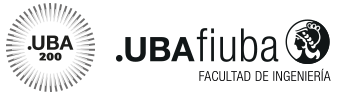



# <center> GRACIAS POR SU ATENCIÓN

## <center> ¿PREGUNTAS?

### <center> Ecuaciones no Lineales - Tercera Parte

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 Análisis Numérico I. *Curso 4*.
- CB051 Modelación Numérica. *Curso 4*.